In [1]:
from uproot_io import Events, View
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
import pandas as pd
cutoff_value = 0.99
import os
#my_path = os.path.abspath("Tensorflow Class Generator.ipynb")

from uproot_io import Events, View
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random

random.seed(0)

print("Running...")

def create_event_data(file_path):
    E = Events(file_path)

    view_u = View(E, "u")
    view_v = View(E, "v")
    view_w = View(E, "w")

    u_x = view_u.x
    u_z = view_u.z
    u_adc = view_u.adc
    u_truevtx_z = view_u.true_vtx_z
    u_truevtx_x = view_u.true_vtx_x

    v_x = view_v.x
    v_z = view_v.z
    v_adc = view_v.adc
    v_truevtx_z = view_v.true_vtx_z
    v_truevtx_x = view_v.true_vtx_x

    w_x = view_w.x
    w_z = view_w.z
    w_adc = view_w.adc
    w_truevtx_z = view_w.true_vtx_z
    w_truevtx_x = view_w.true_vtx_x
    
    return (E, view_u, view_v, view_w, u_x, u_z, u_adc, u_truevtx_z, u_truevtx_x, v_x, v_z, v_adc, v_truevtx_z, v_truevtx_x, w_x, w_z, w_adc, w_truevtx_z, w_truevtx_x)

E, view_u, view_v, view_w, u_x, u_z, u_adc, u_truevtx_z, u_truevtx_x, v_x, v_z, v_adc, v_truevtx_z, v_truevtx_x, w_x, w_z, w_adc, w_truevtx_z, w_truevtx_x = create_event_data("CheatedRecoFile_1.root")
    
thr_std=0.2


Running...


In [2]:
def AoI_bundle(bundle, plane, event_number, thresholding=True, no_std=thr_std):
    E, view_u, view_v, view_w, u_x, u_z, u_adc, u_truevtx_z, u_truevtx_x, v_x, v_z, v_adc, v_truevtx_z, v_truevtx_x, w_x, w_z, w_adc, w_truevtx_z, w_truevtx_x = bundle
    if plane=="u":
        AoI_x = u_x[event_number]
        AoI_z = u_z[event_number]
        AoI_adc = u_adc[event_number]
        AoI_truevtxz = u_truevtx_z[event_number]
        AoI_truevtxx = u_truevtx_x[event_number]
    elif plane=="v":
        AoI_x = v_x[event_number]
        AoI_z = v_z[event_number]
        AoI_adc = v_adc[event_number]
        AoI_truevtxz = v_truevtx_z[event_number]
        AoI_truevtxx = v_truevtx_x[event_number]
    elif plane=="w":
        AoI_x = w_x[event_number]
        AoI_z = w_z[event_number]
        AoI_adc = w_adc[event_number]   
        AoI_truevtxz = w_truevtx_z[event_number]
        AoI_truevtxx = w_truevtx_x[event_number]
    else:
        print("PLane not u,v,w")
        
    if thresholding:
        mean = np.average(AoI_adc)
        std = np.std(AoI_adc)
        AoI_x = AoI_x[(mean-no_std*std<AoI_adc)]
        AoI_z = AoI_z[(mean-no_std*std<AoI_adc)]
        AoI_adc = AoI_adc[(mean-no_std*std<AoI_adc)]
    
    return AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx

theta_u = 0.623257100582
theta_v = -0.623257100582
theta_w = 0.

cos_u = np.cos(theta_u)
cos_v = np.cos(theta_v)
cos_w = np.cos(theta_w)
sin_u = np.sin(theta_u)
sin_v = np.sin(theta_v)
sin_w = np.sin(theta_w)

sin_dvu = np.sin(theta_v - theta_u)
sin_dwv = np.sin(theta_w - theta_v)
sin_duw = np.sin(theta_u - theta_w)

def uv_to_y(u, v):
    return ((u * cos_v - v * cos_u) / sin_dvu)

def uv_to_z(u, v):
    return ((u * sin_v - v * sin_u) / sin_dvu)

def uw_to_y(u, w):
    return ((w * cos_u - u * cos_w) / sin_duw)

def uw_to_z(u, w):
    return ((w * sin_u - u * sin_w) / sin_duw)

def vw_to_y(v, w):
    return ((v * cos_w - w * cos_v) / sin_dwv)

def vw_to_z(v, w):
    return ((v * sin_w - w * sin_v) / sin_dwv)

# 3D to wire
def yz_to_u(y, z):
    return z * cos_u - y * sin_u

def yz_to_v(y, z):
    return z * cos_v - y * sin_v

def yz_to_w(y, z):
    return z * cos_w - y * sin_w

def uv_to_yz(u, v):
    return uv_to_y(u, v), uv_to_z(u, v)

def uw_to_yz(u, w):
    return uw_to_y(u, w), uw_to_z(u, w)

def vw_to_yz(v, w):
    return vw_to_y(v, w), vw_to_z(v, w)

interaction_dictionary = {}

import pandas as pd
import csv
import pandas as pd
import numpy as np

with open('interactions.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        key = int(row.pop('Idx'))
        interaction = row.pop('Interaction')
        interaction_dictionary[key] = interaction
        
def interaction_finder(events):
    all_events = np.unique(events.event_number)
    x = [ events.interaction_type[np.where(events.event_number == e)] for e in all_events ]
    return x

def interaction_selector(interaction_dictionary):
    #CC and NC Split
    CC_indexes = []
    NC_indexes = []
    QEL_indexes = []
    DIS_indexes = []
    RES_indexes = []
    EL_indexes = []
    MU_indexes = []
    EL_QEL_indexes = []
    MU_QEL_indexes = []
    
    for i in range(len(interaction_dictionary)):
        first_two = (interaction_dictionary[i])[:2]
        if first_two == 'CC':
            CC_indexes.append(i)
        elif first_two == 'NC':
            NC_indexes.append(i)
            
    for i in range(len(interaction_dictionary)):
        first_three = (interaction_dictionary[i])[2:5]
        if first_three == 'QEL':
            QEL_indexes.append(i)
        elif first_three == 'DIS':
            DIS_indexes.append(i)
        elif first_three == 'RES':
            RES_indexes.append(i)
            
    for i in range(len(interaction_dictionary)-2):
        first_one = (interaction_dictionary[i])[6:7]
        if first_one == 'M':
            MU_indexes.append(i)
        elif first_one == 'E':
            EL_indexes.append(i)
            
    EL_QEL_indexes = [value for value in QEL_indexes if value in EL_indexes]
    MU_QEL_indexes = [value for value in QEL_indexes if value in MU_indexes]
        
    return CC_indexes, NC_indexes, QEL_indexes, DIS_indexes, RES_indexes, EL_indexes, MU_indexes, EL_QEL_indexes, MU_QEL_indexes

def interaction_splitting(interaction_type_array):
    CC_splitting = []
    NC_splitting = []
    QEL_splitting = []
    DIS_splitting = []
    RES_splitting = []
    EL_splitting = []
    MU_splitting = []
    
    EL_QEL_spitting = []
    MU_QEL_spitting = []
    
    CC_indexes, NC_indexes, QEL_indexes, DIS_indexes, RES_indexes, EL_indexes, MU_indexes, EL_QEL_indexes, MU_QEL_indexes = interaction_selector(interaction_dictionary)
    for i in range(len(interaction_type_array)):
        if int(interaction_type_array[i][0]) in CC_indexes:
            CC_splitting.append(i)
        if int(interaction_type_array[i][0]) in NC_indexes:
            NC_splitting.append(i)
        if int(interaction_type_array[i][0]) in QEL_indexes:
            QEL_splitting.append(i)
            if int(interaction_type_array[i][0]) in EL_indexes:
                EL_QEL_spitting.append(i)
            if int(interaction_type_array[i][0]) in MU_indexes:
                MU_QEL_spitting.append(i)
        if int(interaction_type_array[i][0]) in RES_indexes:
            RES_splitting.append(i)
        if int(interaction_type_array[i][0]) in DIS_indexes:
            DIS_splitting.append(i)
        if int(interaction_type_array[i][0]) in MU_indexes:
            MU_splitting.append(i)
        if int(interaction_type_array[i][0]) in EL_indexes:
            EL_splitting.append(i)
        
    return (CC_splitting, NC_splitting, QEL_splitting, DIS_splitting, RES_splitting, EL_splitting, MU_splitting, EL_QEL_splitting, MU_QEL_splitting)

In [3]:
CC_splitting, NC_splitting, QEL_splitting, DIS_splitting, RES_splitting, EL_splitting, MU_splitting, EL_QEL_splitting, MU_QEL_splitting = interaction_selector(interaction_dictionary)

In [4]:
CC_splitting, NC_splitting, QEL_splitting, DIS_splitting, RES_splitting, EL_splitting, MU_splitting, EL_QEL_splitting, MU_QEL_splitting = interaction_splitting(interaction_finder(E))

In [5]:
print(EL_splitting)
#print(MU_splitting)
#print(NC_splitting)

[269, 463, 471, 480, 482, 486, 488, 489, 495, 503, 504, 506, 512, 513, 519, 521, 522, 523, 526, 529, 536, 537, 540, 562, 564, 565, 568, 569, 572, 578, 579, 580, 583, 585, 587, 595, 596, 598, 600, 605, 608, 609, 613, 616, 626, 631, 633, 639, 640, 646, 648, 649, 650, 652, 654, 661, 671, 679, 682, 686, 689, 695, 698, 699, 700, 701, 702, 704, 706, 708, 710, 711, 715, 716, 719, 725, 728, 729, 730, 736, 737, 741, 745, 748, 764, 767, 768, 769, 771, 773, 777, 779, 780, 781, 782, 785, 786, 788, 791, 793, 795, 796, 802, 804, 807, 811, 814, 815, 817, 818, 820, 821, 824, 826, 827, 828, 839, 841, 843, 851, 853, 855, 860, 865, 868, 870, 872, 874, 878, 880, 885, 886, 887, 891, 892, 894, 898, 903, 904, 906, 911, 913, 917, 918, 927, 1072, 1409, 1411, 1417, 1420, 1421, 1428, 1433, 1437, 1440, 1442, 1451, 1455, 1457, 1459, 1461, 1463, 1466, 1467, 1472, 1479, 1480, 1482, 1483, 1486, 1493, 1501, 1503, 1504, 1505, 1516, 1519, 1520, 1524, 1527, 1529, 1532, 1533, 1538, 1544, 1545, 1547, 1549, 1553, 1554, 1558

In [6]:
def plot_training_data(bundle, plane, event, CCorNC, bundle_no, ifsave=True):
    AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx = AoI_bundle(bundle, plane, event)
    plt.clf()
    #px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    #plt.figure(figsize=(224*px, 224*px))
    plt.figure(frameon=False)
    plt.scatter(AoI_z, AoI_x, s=4)
    ax = plt.gca()
    plt.axis('off')
    
    figure = plt.gcf()

    figure.set_size_inches(2.24, 2.24)
    if ifsave:
        plt.savefig("./"+CCorNC+"/"+str(plane)+str(event)+CCorNC+str(bundle_no)+'.png', dpi=100)
    plt.clf()
    plt.close()
    return 0

In [7]:
#bundle = create_event_data("CheatedRecoFile_1.root")
#plot_training_data(bundle, "u", 14, "CCMU", 1)

In [32]:
bundle2 = create_event_data("CheatedRecoFile_2.root")

In [43]:
splitting_ind_bundle2 = interaction_splitting(interaction_finder(bundle2[0]))

In [44]:
splitting_ind_bundle2[1]

[14,
 21,
 33,
 35,
 38,
 45,
 62,
 64,
 67,
 73,
 75,
 79,
 100,
 104,
 109,
 111,
 126,
 131,
 144,
 161,
 163,
 171,
 176,
 180,
 181,
 185,
 187,
 188,
 195,
 197,
 206,
 219,
 220,
 225,
 237,
 240,
 253,
 261,
 267,
 269,
 273,
 287,
 292,
 305,
 318,
 321,
 329,
 339,
 342,
 343,
 365,
 366,
 367,
 383,
 398,
 399,
 402,
 411,
 425,
 427,
 432,
 439,
 441,
 446,
 449,
 460,
 468,
 474,
 477,
 486,
 487,
 506,
 507,
 509,
 519,
 520,
 530,
 534,
 592,
 600,
 601,
 605,
 607,
 615,
 621,
 630,
 646,
 652,
 656,
 668,
 697,
 709,
 711,
 719,
 721,
 732,
 736,
 738,
 753,
 754,
 755,
 759,
 771,
 795,
 806,
 808,
 811,
 822,
 823,
 829,
 835,
 838,
 850,
 855,
 858,
 867,
 872,
 878,
 893,
 902,
 904,
 913,
 916,
 917,
 920,
 946,
 951,
 962,
 968,
 969,
 986,
 989,
 998,
 1023,
 1028,
 1039,
 1054,
 1062,
 1074,
 1077,
 1097,
 1103,
 1105,
 1108,
 1125,
 1132,
 1144,
 1151,
 1165,
 1209,
 1211,
 1213,
 1217,
 1234,
 1243,
 1245,
 1248,
 1249,
 1262,
 1263,
 1273,
 1279,
 1291,
 129

In [8]:
def generate_bundle_event_and_splitting(filepath):
    # bundle:
    # E, view_u, view_v, view_w, u_x, u_z, u_adc, u_truevtx_z, u_truevtx_x, v_x, v_z, v_adc, v_truevtx_z, v_truevtx_x, w_x, w_z, w_adc, w_truevtx_z, w_truevtx_x
    
    # index splitting of events in bundle:
    # CC_splitting, NC_splitting, QEL_splitting, DIS_splitting, RES_splitting, EL_splitting, MU_splitting
    
    bundle = create_event_data(filepath)
    index_splitting_bundle = interaction_splitting(interaction_finder(bundle[0]))
    return bundle, index_splitting_bundle

In [47]:
bundle, index_splitting_bundle = generate_bundle_event_and_splitting("CheatedRecoFile_2.root")

In [10]:
def produce_dataset_from_bundle(filepath, bundle_no):
    bundle, index_splitting_bundle = generate_bundle_event_and_splitting(filepath)
    
    EL_indices, MU_indices, NC_indices = index_splitting_bundle[5], index_splitting_bundle[6], index_splitting_bundle[1]
    EL_QEL_indices, MU_QEL_indices = index_splitting_bundle[7], index_splitting_bundle[8]
    
    for i in tqdm(range(len(EL_indices))):
        plot_training_data(bundle, "u", EL_indices[i], "CCE", bundle_no)
        
    print("Finished: CCE")
        
    for i in tqdm(range(len(MU_indices))):
        plot_training_data(bundle, "u", MU_indices[i], "CCMU", bundle_no)
        
    print("Finished: CCMU")
        
    for i in tqdm(range(len(NC_indices))):
        plot_training_data(bundle, "u", NC_indices[i], "NC", bundle_no)
        
    print("Finished: NC")
    
    with open("ELindexes"+str(bundle_no)+".txt", "w") as output:
        output.write(str(EL_indices))
    
    with open("MUindexes"+str(bundle_no)+".txt", "w") as output:
        output.write(str(MU_indices))
        
    with open("NCindexes"+str(bundle_no)+".txt", "w") as output:
        output.write(str(NC_indices))
    
    return EL_indices, MU_indices, NC_indices

In [12]:
EL_indices, MU_indices, NC_indices = produce_dataset_from_bundle("CheatedRecoFile_2.root", 2)

100%|██████████████████████████████████████████████████████████████████████████████| 1480/1480 [01:10<00:00, 20.96it/s]


Finished: CCE


100%|██████████████████████████████████████████████████████████████████████████████| 2003/2003 [01:34<00:00, 21.25it/s]


Finished: CCMU


100%|██████████████████████████████████████████████████████████████████████████████| 1160/1160 [00:56<00:00, 20.45it/s]


Finished: NC


<Figure size 640x480 with 0 Axes>

In [13]:
EL_indices, MU_indices, NC_indices = produce_dataset_from_bundle("CheatedRecoFile_3.root", 3)

100%|██████████████████████████████████████████████████████████████████████████████| 1510/1510 [01:07<00:00, 22.23it/s]


Finished: CCE


100%|██████████████████████████████████████████████████████████████████████████████| 2042/2042 [01:36<00:00, 21.20it/s]


Finished: CCMU


100%|██████████████████████████████████████████████████████████████████████████████| 1144/1144 [00:51<00:00, 22.20it/s]


Finished: NC


<Figure size 640x480 with 0 Axes>

In [14]:
EL_indices, MU_indices, NC_indices = produce_dataset_from_bundle("CheatedRecoFile_4.root", 4)

100%|██████████████████████████████████████████████████████████████████████████████| 1474/1474 [01:04<00:00, 22.86it/s]


Finished: CCE


100%|██████████████████████████████████████████████████████████████████████████████| 2055/2055 [01:34<00:00, 21.86it/s]


Finished: CCMU


100%|██████████████████████████████████████████████████████████████████████████████| 1111/1111 [00:53<00:00, 20.73it/s]


Finished: NC


<Figure size 640x480 with 0 Axes>

In [15]:
EL_indices, MU_indices, NC_indices = produce_dataset_from_bundle("CheatedRecoFile_5.root", 5)

100%|██████████████████████████████████████████████████████████████████████████████| 1466/1466 [01:11<00:00, 20.48it/s]


Finished: CCE


100%|██████████████████████████████████████████████████████████████████████████████| 2040/2040 [01:34<00:00, 21.56it/s]


Finished: CCMU


100%|██████████████████████████████████████████████████████████████████████████████| 1077/1077 [00:53<00:00, 20.30it/s]


Finished: NC


<Figure size 640x480 with 0 Axes>

In [16]:
EL_indices, MU_indices, NC_indices = produce_dataset_from_bundle("CheatedRecoFile_6.root", 6)

100%|██████████████████████████████████████████████████████████████████████████████| 1535/1535 [01:10<00:00, 21.84it/s]


Finished: CCE


100%|██████████████████████████████████████████████████████████████████████████████| 2025/2025 [01:39<00:00, 20.35it/s]


Finished: CCMU


100%|██████████████████████████████████████████████████████████████████████████████| 1166/1166 [00:54<00:00, 21.40it/s]


Finished: NC


<Figure size 640x480 with 0 Axes>

In [17]:
EL_indices, MU_indices, NC_indices = produce_dataset_from_bundle("CheatedRecoFile_1.root", 1)

100%|██████████████████████████████████████████████████████████████████████████████| 1504/1504 [01:11<00:00, 21.15it/s]


Finished: CCE


100%|██████████████████████████████████████████████████████████████████████████████| 2074/2074 [01:39<00:00, 20.92it/s]


Finished: CCMU


100%|██████████████████████████████████████████████████████████████████████████████| 1132/1132 [00:53<00:00, 21.04it/s]


Finished: NC


<Figure size 640x480 with 0 Axes>

In [18]:
def produce_dataset_from_bundle_valid(filepath, bundle_no):
    bundle, index_splitting_bundle = generate_bundle_event_and_splitting(filepath)
    
    EL_indices, MU_indices, NC_indices = index_splitting_bundle[5], index_splitting_bundle[6], index_splitting_bundle[1]
    
    for i in tqdm(range(len(EL_indices))):
        plot_training_data(bundle, "u", EL_indices[i], "CCEvalid", bundle_no)
        
    print("Finished: CCE")
        
    for i in tqdm(range(len(MU_indices))):
        plot_training_data(bundle, "u", MU_indices[i], "CCMUvalid", bundle_no)
        
    print("Finished: CCMU")
        
    for i in tqdm(range(len(NC_indices))):
        plot_training_data(bundle, "u", NC_indices[i], "NCvalid", bundle_no)
        
    print("Finished: NC")
    
    with open("ELindexes"+str(bundle_no)+".txt", "w") as output:
        output.write(str(EL_indices))
    
    with open("MUindexes"+str(bundle_no)+".txt", "w") as output:
        output.write(str(MU_indices))
        
    with open("NCindexes"+str(bundle_no)+".txt", "w") as output:
        output.write(str(NC_indices))
    
    return EL_indices, MU_indices, NC_indices

In [19]:
EL_indices, MU_indices, NC_indices = produce_dataset_from_bundle_valid("CheatedRecoFile_7.root", 7)

100%|██████████████████████████████████████████████████████████████████████████████| 1507/1507 [01:14<00:00, 20.11it/s]


Finished: CCE


100%|██████████████████████████████████████████████████████████████████████████████| 2065/2065 [01:38<00:00, 20.90it/s]


Finished: CCMU


100%|██████████████████████████████████████████████████████████████████████████████| 1145/1145 [00:54<00:00, 20.90it/s]


Finished: NC


<Figure size 640x480 with 0 Axes>

In [20]:
EL_indices, MU_indices, NC_indices = produce_dataset_from_bundle_valid("CheatedRecoFile_8.root", 8)

100%|██████████████████████████████████████████████████████████████████████████████| 1503/1503 [01:10<00:00, 21.27it/s]


Finished: CCE


100%|██████████████████████████████████████████████████████████████████████████████| 2061/2061 [01:42<00:00, 20.02it/s]


Finished: CCMU


100%|██████████████████████████████████████████████████████████████████████████████| 1195/1195 [00:59<00:00, 19.94it/s]


Finished: NC


<Figure size 640x480 with 0 Axes>

In [21]:
bundle, index_splitting_bundle = generate_bundle_event_and_splitting("CheatedRecoFile_1.root")

In [10]:
def plot_training_data_sample(bundle, plane, event):
    AoI_x, AoI_z, AoI_adc, AoI_truevtxz, AoI_truevtxx = AoI_bundle(bundle, plane, event)
    plt.scatter(AoI_z, AoI_x, s=4)
    plt.show()
    return 0

def plot_event_selection(bundle, index_splitting_bundle, bundle_no, plane, CCorNC, num_show=5):
    EL_indices, MU_indices, NC_indices = index_splitting_bundle[5], index_splitting_bundle[6], index_splitting_bundle[1]
    if CCorNC == 'EL':
        sample = random.sample(EL_indices, num_show)
    if CCorNC == 'MU':
        sample = random.sample(MU_indices, num_show)
    if CCorNC == 'NC':
        sample = random.sample(NC_indices, num_show)

    for i in range(num_show):
        plot_training_data_sample(bundle, plane, sample[i])
    
    return 0

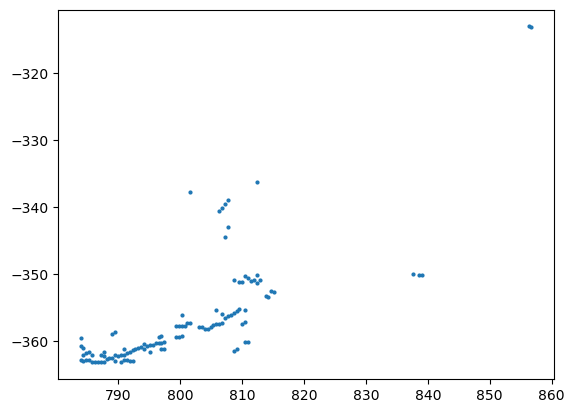

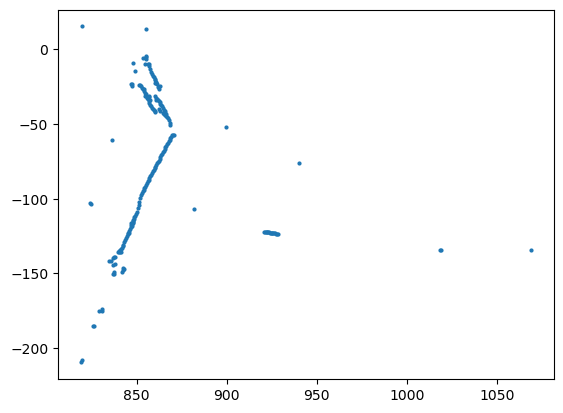

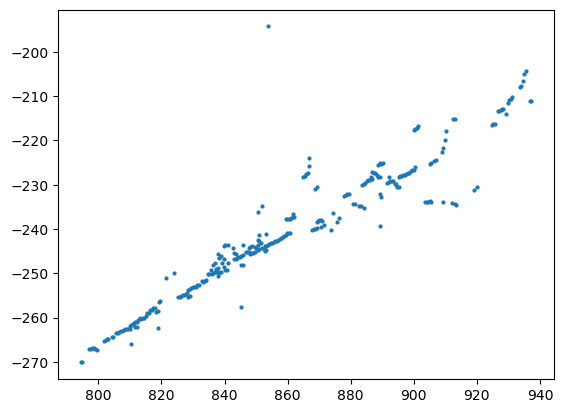

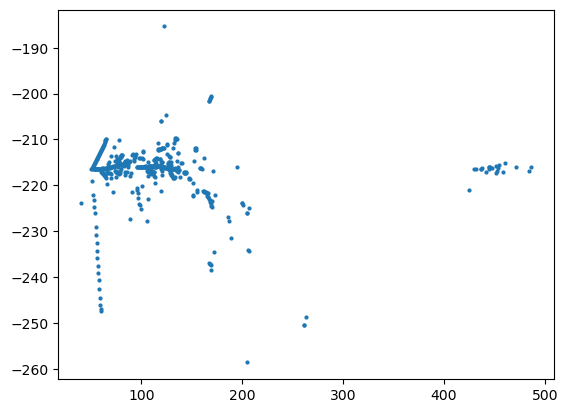

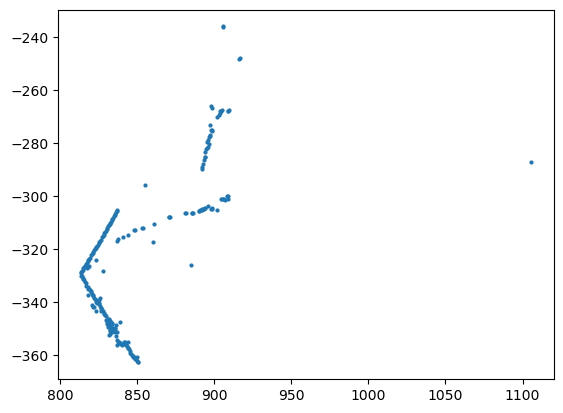

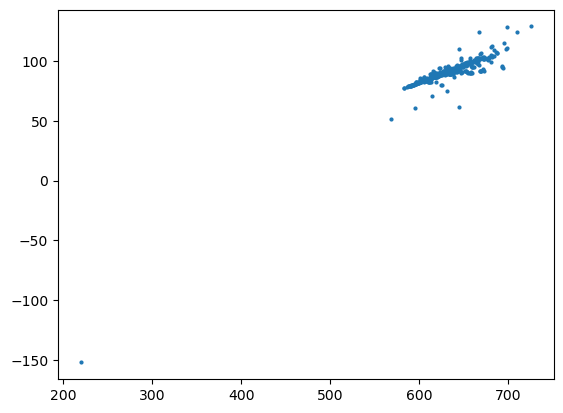

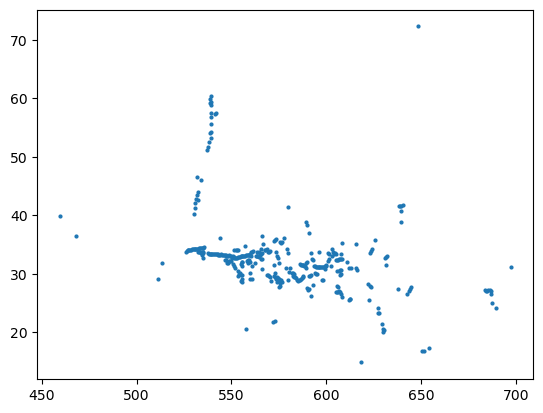

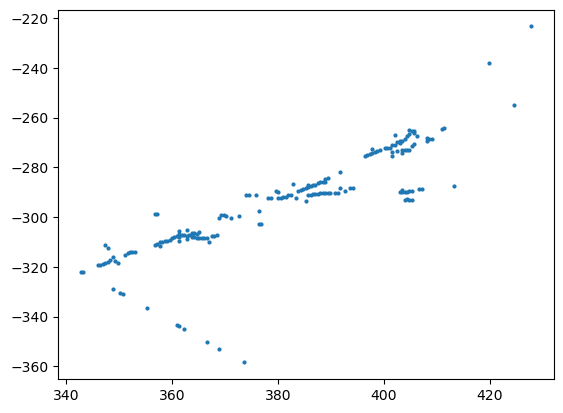

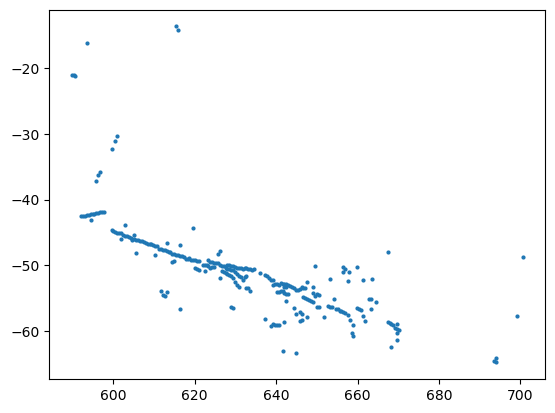

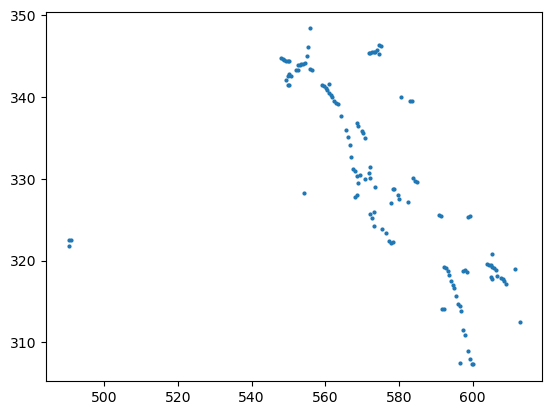

0

In [11]:
plot_event_selection(bundle, index_splitting_bundle, 1, "u", 'EL', 10)

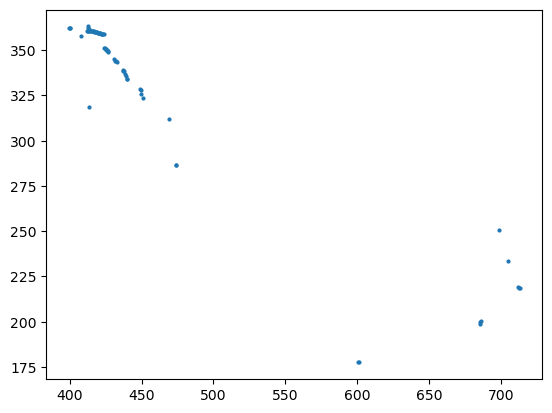

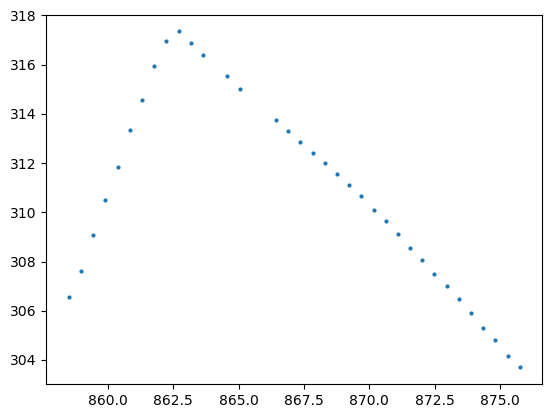

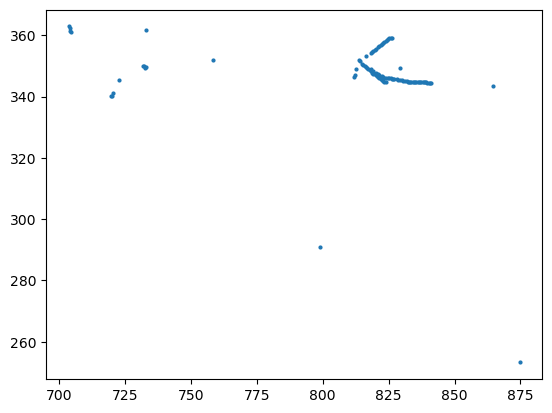

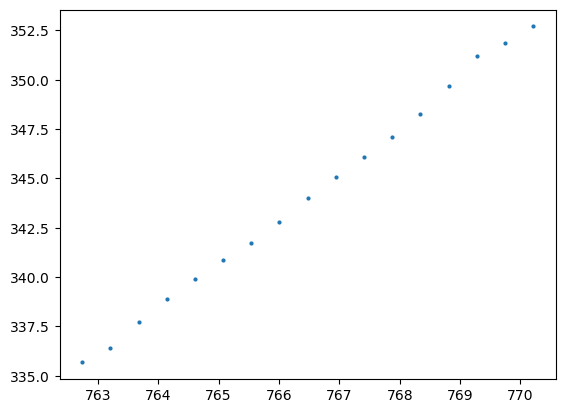

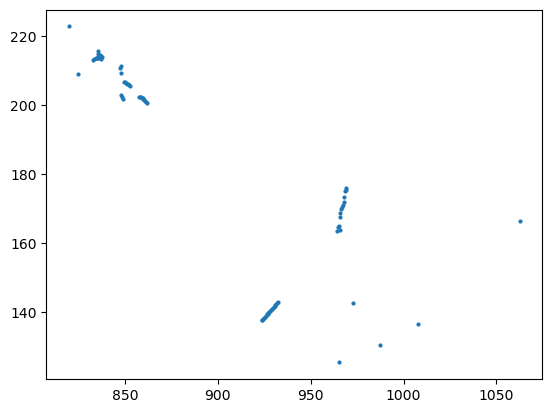

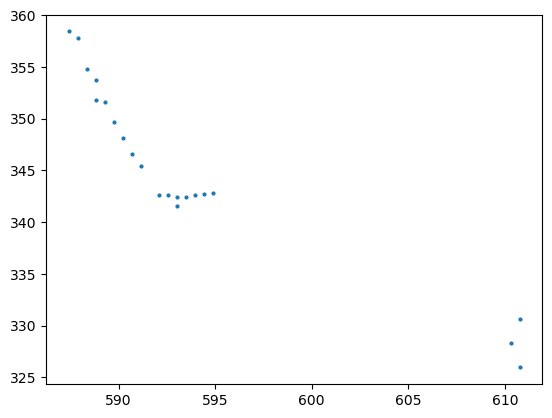

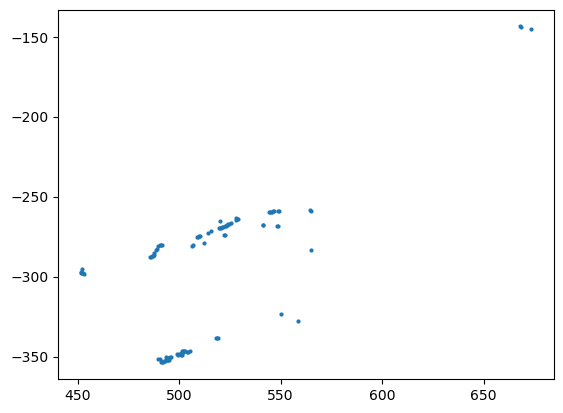

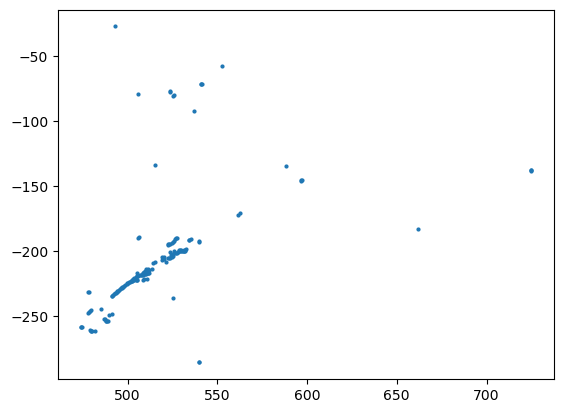

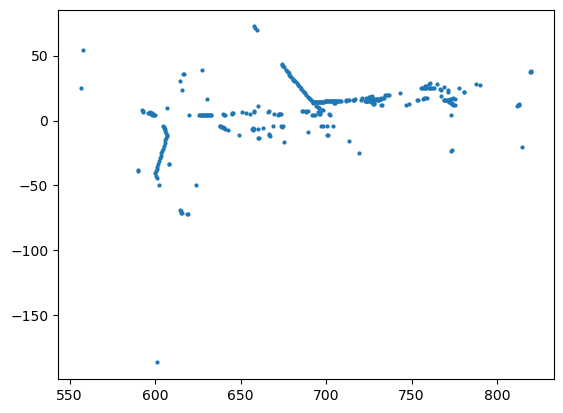

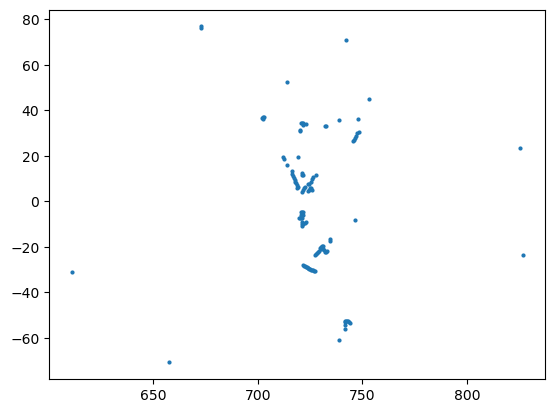

0

In [12]:
plot_event_selection(bundle, index_splitting_bundle, 1, "u", 'NC', 10)

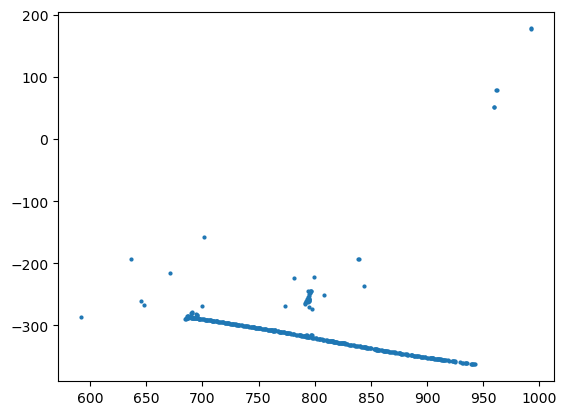

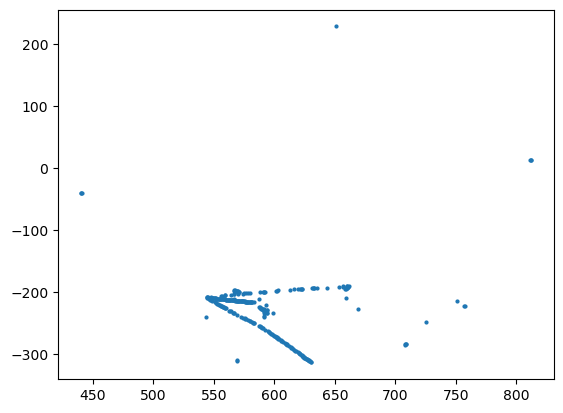

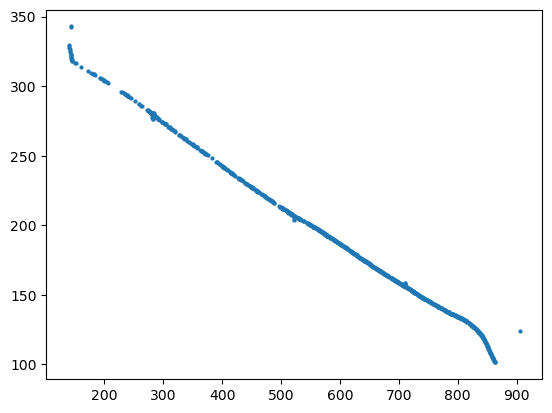

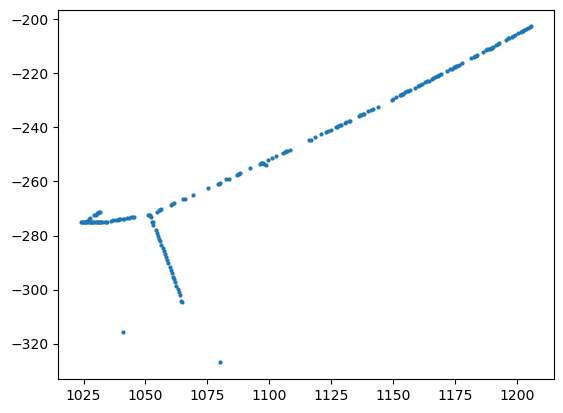

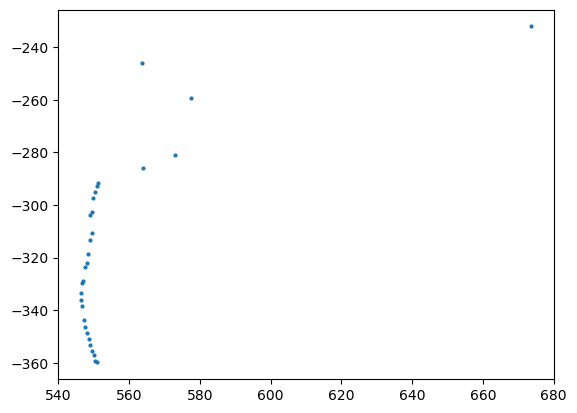

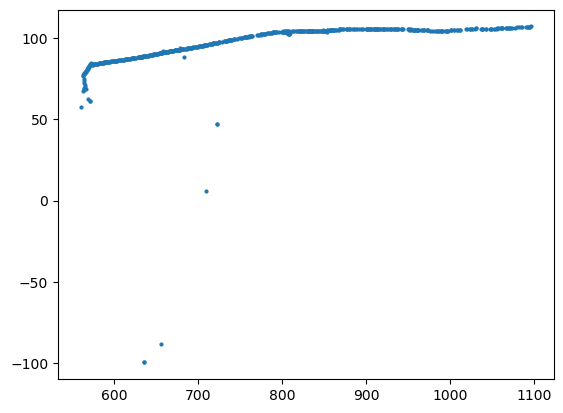

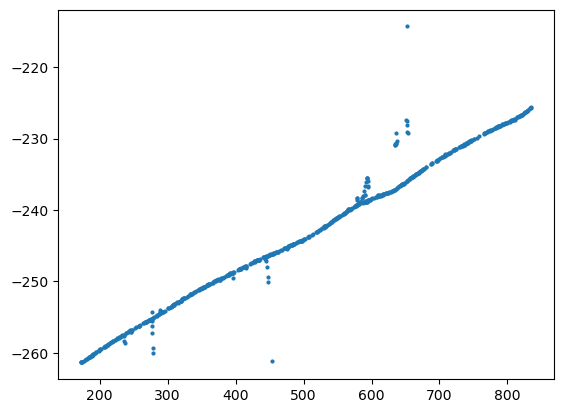

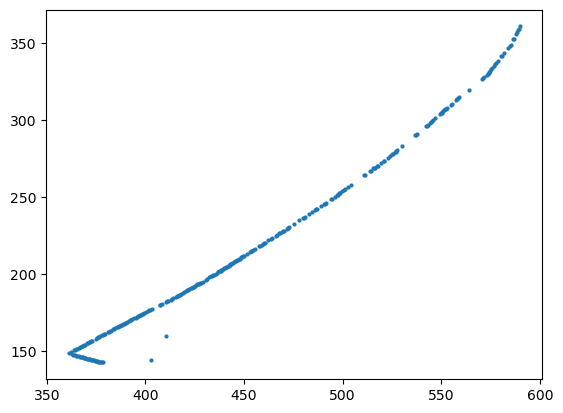

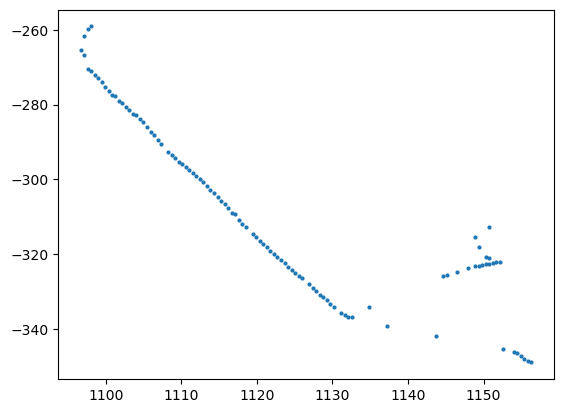

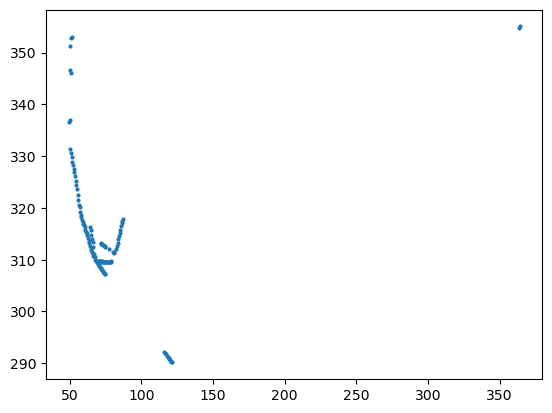

0

In [13]:
plot_event_selection(bundle, index_splitting_bundle, 1, "u", 'MU', 10)